In [3]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.advanced_activations import ELU
import os

num_classes=6
img_rows,img_cols=48,48
batch_size=16

train_data_dir='C:\\Users\\kapri\\Desktop\\fer2013\\train'
validation_data_dir='C:\\Users\\kapri\\Desktop\\fer2013\\validation'

#doing some data argumentation
train_datagen=ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=30,
                                shear_range=0.3,
                                zoom_range=0.3,
                                width_shift_range=0.3,
                                height_shift_range=0.3,
                                horizontal_flip=True)

validation_datagen=ImageDataGenerator(
                                     rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                 color_mode='grayscale',
                                                 target_size=(img_rows,img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)
validation_generator=validation_datagen.flow_from_directory(validation_data_dir,
                                                           color_mode='grayscale',
                                                           target_size=(img_rows,img_cols),
                                                           batch_size=batch_size,
                                                           class_mode='categorical',
                                                           shuffle=True)

Found 28273 images belonging to 6 classes.
Found 3534 images belonging to 6 classes.


## OUR Keras Imports

In [4]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation,Flatten,Dropout,Dense


## Little VGG


In [24]:
model=Sequential()

#1st block
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer="he_normal",
                 input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer="he_normal",
                 input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#2nd Block
model.add(Conv2D(64,(3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#3rd block
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#4th block
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


# 5th block
model.add(Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))




# 6th block FC Layer
model.add(Flatten())
model.add(Dense(1024,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2048,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_105 (Activation)  (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_100 (Bat (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_106 (Activation)  (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_101 (Bat (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 24, 24, 32)      

## training our Model

In [25]:
from keras.optimizers import SGD,RMSprop,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint('emotion_LittleVGG.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=5,
                       restore_best_weights=True,
                        verbose=1)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

#putting callbacks in a list
callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.0001),
             metrics=['accuracy'])

nb_train_samples=28273
nb_validation_samples=3534
epochs=10

history=model.fit_generator(train_generator,
                           steps_per_epoch=nb_train_samples//batch_size,
                           epochs=epochs,
                           callbacks=callbacks,
                           validation_data=validation_generator,
                           validation_steps=nb_validation_samples//batch_size)

Epoch 1/10
1767/1767 [==============================] - 101s 57ms/step - loss: 2.6442 - accuracy: 0.1867 - val_loss: 2.0961 - val_accuracy: 0.2412

Epoch 00001: val_loss improved from inf to 2.09615, saving model to emotion_LittleVGG.h5
Epoch 2/10
1767/1767 [==============================] - 103s 58ms/step - loss: 2.2833 - accuracy: 0.1975 - val_loss: 1.9035 - val_accuracy: 0.2501

Epoch 00002: val_loss improved from 2.09615 to 1.90350, saving model to emotion_LittleVGG.h5
Epoch 3/10
1767/1767 [==============================] - 106s 60ms/step - loss: 2.1017 - accuracy: 0.2021 - val_loss: 1.1024 - val_accuracy: 0.2339

Epoch 00003: val_loss improved from 1.90350 to 1.10235, saving model to emotion_LittleVGG.h5
Epoch 4/10
1767/1767 [==============================] - 97s 55ms/step - loss: 1.9726 - accuracy: 0.2070 - val_loss: 2.3864 - val_accuracy: 0.2476

Epoch 00004: val_loss did not improve from 1.10235
Epoch 5/10
1767/1767 [==============================] - 100s 57ms/step - loss: 1.90

## confusion Matrix

C:\Users\kapri\anaconda3\envs\venv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kapri\anaconda3\envs\venv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kapri\anaconda3\envs\venv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kapri\anaconda3\envs\venv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Found 3534 images belonging to 6 classes.
Confusion Matrix
[[264  30  33  91  41  32]
 [ 99  85  43  93  78 130]
 [ 32  11 761  41   8  26]
 [109  33 172 160  66  86]
 [ 62  57  91 187 183  14]
 [ 18  22  29  12   2 333]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.45      0.54      0.49       491
        Fear       0.36      0.16      0.22       528
       Happy       0.67      0.87      0.76       879
     Neutral       0.27      0.26      0.26       626
         Sad       0.48      0.31      0.38       594
    Surprise       0.54      0.80      0.64       416

    accuracy                           0.51      3534
   macro avg       0.46      0.49      0.46      3534
weighted avg       0.48      0.51      0.48      3534



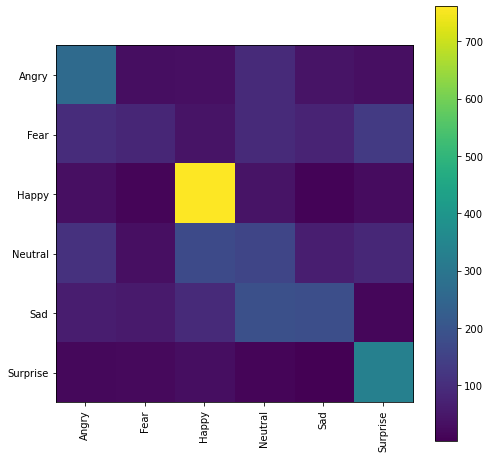

In [9]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 28273
nb_validation_samples = 3534

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

## loading our Model

In [10]:
from keras.models import load_model

classifier=load_model('emotion_LittleVGG.h5')

## getting Class Labels


In [11]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 3534 images belonging to 6 classes.
{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Surprise'}


## testing on validation images

In [12]:
from keras.models import load_model
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "\\" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height),grayscale=True), final_path, path_class

# dimensions of our images
img_width, img_height = 48, 48

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = 'C:\\Users\\kapri\\Desktop\\fer2013\\validation\\' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

C:\Users\kapri\anaconda3\envs\venv\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


## testing using webcam

In [13]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier(r'C:\Users\kapri\Desktop\age-gender-estimation\Haarcascades\haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

## on single image

In [14]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier(r'C:\Users\kapri\Desktop\age-gender-estimation\Haarcascades\haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    allfaces = []   
    rects = []
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
        allfaces.append(roi_gray)
        rects.append((x,w,y,h))
    return rects, allfaces, img

img = cv2.imread(r"")
rects, faces, image = face_detector(img)

i = 0
for face in faces:
    roi = face.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)

    # make a prediction on the ROI, then lookup the class
    preds = classifier.predict(roi)[0]
    label = class_labels[preds.argmax()]   

    #Overlay our detected emotion on our pic
    label_position = (rects[i][0] + int((rects[i][1]/2)), abs(rects[i][2] - 10))
    i =+ 1
    cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    
cv2.imshow("Emotion Detector", image)
cv2.waitKey(0)

cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'